In [1]:
from module.pianoRollExtractor import PianoRollExtractor

pre = PianoRollExtractor("select-midi/1238.midi")

In [2]:
import numpy as np
data = []
x = 0
while True:
    part = pre.get_piano_roll(start=(2 + x), end=(22 + x))
    if part.shape[0] != 480:
        break
    data.append(part)
    x += 1
data = np.array(data)

print(data.shape)

(1363, 480, 128)


In [3]:
from module.pianoRollGAN import GAN

model = GAN(Train=False)

2024-02-08 21:37:20.786966: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-08 21:37:20.811471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 21:37:20.811501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 21:37:20.812181: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 21:37:20.816659: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 61440)             0         
                                                                 
 dense (Dense)               (None, 512)               31457792  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 31589377 (120.50 MB)
Trainable params: 315

In [15]:
model.train(1000, data[:100], batch_size=10)

1/1 [==============================] - 0s 22ms/step
0 [D loss: 0.010722, acc.: 100.00%] [G loss: 5.130698]
1/1 [==============================] - 0s 22ms/step
1 [D loss: 0.004385, acc.: 100.00%] [G loss: 4.360837]
1/1 [==============================] - 0s 21ms/step
2 [D loss: 0.008819, acc.: 100.00%] [G loss: 4.929287]
1/1 [==============================] - 0s 22ms/step
3 [D loss: 0.005786, acc.: 100.00%] [G loss: 5.186774]
1/1 [==============================] - 0s 23ms/step
4 [D loss: 0.016914, acc.: 100.00%] [G loss: 5.104336]
1/1 [==============================] - 0s 25ms/step
5 [D loss: 0.020936, acc.: 100.00%] [G loss: 5.365857]
1/1 [==============================] - 0s 22ms/step
6 [D loss: 0.010551, acc.: 100.00%] [G loss: 5.878778]
1/1 [==============================] - 0s 23ms/step
7 [D loss: 0.002929, acc.: 100.00%] [G loss: 5.878808]
1/1 [==============================] - 0s 22ms/step
8 [D loss: 0.006699, acc.: 100.00%] [G loss: 5.483451]
1/1 [==============================] 

In [58]:
result = model.predict()
result = result.reshape(480, 128)
result = (result > 0.5)
result = result.astype(bool)

1/1 [==============================] - 0s 23ms/step


In [59]:
res_piano_roll = PianoRollExtractor(pianoRoll=result)


fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter '/home/Yukiche/.fluidsynth/default_sound_font.sf2' not a SoundFont or MIDI file or error occurred identifying it.


FluidSynth runtime version 2.3.4
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'result.wav'..


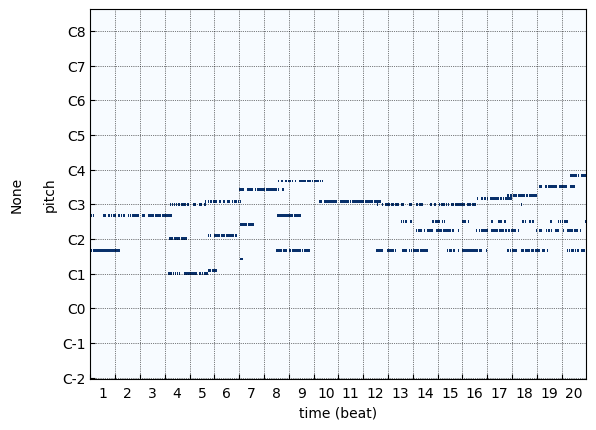

In [60]:
res_piano_roll.plot()

res_piano_roll.save_as_wav("result.wav")

In [8]:
# save GAN weights

# model.combined.save_weights("combined_weights.h5")
# model.generator.save_weights("generator_weights.h5")
# model.discriminator.save_weights("discriminator_weights.h5")